<a href="https://colab.research.google.com/github/jnsbrdbr/thesis/blob/thesis/part8_Tguassinsvm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [2]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip3 install pickle5
import pickle5 as pickle

In [4]:
with open('/content/drive/MyDrive/10000/Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [5]:
print(result)

              0         1          2  ...         8         9  label
0     -2.231665 -3.223353  -0.847867  ... -0.068575 -0.230930      1
1     -2.231665 -3.223353  -0.847867  ... -0.068575 -0.230930      1
2     -2.231665 -3.223353  -0.847867  ... -0.068575 -0.230930      1
3     -2.231665 -3.223353  -0.847867  ... -0.068575 -0.230930      1
4     -2.231871 -3.223762  -0.848254  ...  0.048557  0.160622      1
...         ...       ...        ...  ...       ...       ...    ...
13209 -2.231665 -3.223353  -0.847867  ...  0.046943  0.150109      0
13210 -2.857167 -4.505172  18.597988  ... -0.129873 -0.451315      0
13211 -2.231665 -3.223353  -0.847867  ...  0.063843  0.211098      0
13212 -2.231665 -3.223353  -0.847867  ...  0.063843  0.211097      0
13213 -2.231665 -3.223353  -0.847867  ...  0.013998  0.046459      0

[13214 rows x 101 columns]


In [6]:
import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [8]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

k=svm.SVC(kernel="rbf", gamma=0.0001, C=10, probability=True)
gpc = k.fit(x_train, y_train)

In [9]:
predictions = gpc.predict(x_test)
score = gpc.score(x_test, y_test)
print(score)

0.971500630517024


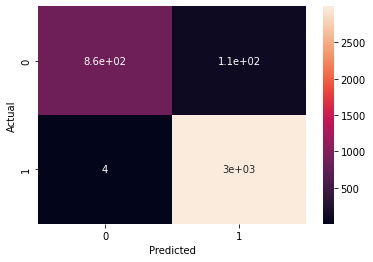

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics



confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)


In [11]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2997
False Positives: 109
True Negatives: 855
False Negatives: 4


In [12]:
print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.971500630517024


In [13]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)# x_train, y_train, random_state=42,, shuffle=True
scores = cross_val_score(k,X, y, scoring='accuracy', cv=cv)#,n_jobs=-1

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.858 (0.127)


In [14]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)#, random_state=42, shuffle=True
scores_recall = cross_val_score(k,X,y, scoring='recall', cv=cv)#,n_jobs=-1

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.664 (0.366)


In [15]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

cv = KFold(n_splits=10)#, random_state=42, shuffle=True
scores_precision = cross_val_score(k, X, y, scoring='precision', cv=cv)#,n_jobs=-1

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.786 (0.394)


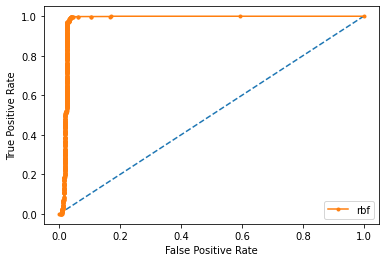


 Logistic ROC AUC 0.979


In [16]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import warnings
warnings.filterwarnings('ignore')


k=svm.SVC(kernel="rbf", gamma=0.0001, C=10, probability=True)
k.fit(x_train, y_train)
yhat = k.predict_proba(x_test)
pos_probs = yhat[:, 1]
pyplot.plot([0, 1], [0, 1], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='rbf')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

roc_auc = roc_auc_score(y_test, pos_probs)
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [17]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = svm.SVC(kernel="rbf", gamma=0.0001, C=10)
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
    #X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    #y_train , y_test = y[train_index] , y[test_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print(' fpr=%.3f' % (mean(fpr)))#tpr=%.4f:mean(tpr),
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n','total_fpr=%.3f' % (total_fpr))# total_tpr=%.4f:total_tpr, 

True Positives: 2998
False Positives: 107
True Negatives: 855
False Negatives: 5
 fpr=0.111
x
---------------------
True Positives: 2976
False Positives: 86
True Negatives: 894
False Negatives: 9
 fpr=0.088
x
---------------------
True Positives: 2998
False Positives: 106
True Negatives: 857
False Negatives: 4
 fpr=0.110
x
---------------------
True Positives: 3019
False Positives: 105
True Negatives: 835
False Negatives: 6
 fpr=0.112
x
---------------------
True Positives: 2938
False Positives: 95
True Negatives: 924
False Negatives: 8
 fpr=0.093
x
---------------------
True Positives: 2974
False Positives: 121
True Negatives: 866
False Negatives: 4
 fpr=0.123
x
---------------------
True Positives: 2943
False Positives: 111
True Negatives: 904
False Negatives: 7
 fpr=0.109
x
---------------------
True Positives: 2955
False Positives: 96
True Negatives: 906
False Negatives: 8
 fpr=0.096
x
---------------------
True Positives: 2956
False Positives: 101
True Negatives: 900
False Negativ